___
# Ecommerce Project

An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their MOBILE APP experience OR their WEBSITE. 

####fake data####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

### Get and Check the Data

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


##### Checking the distribution of the target variable

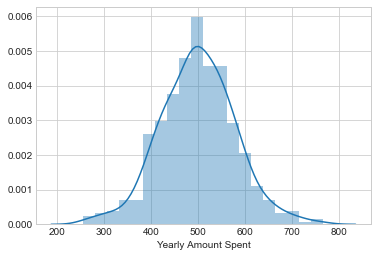

In [6]:
sns.distplot(customers['Yearly Amount Spent'])

## Exploratory Data Analysis

For the rest of the exercise I'll only be using the numerical data of the csv file.

#### I wanna correlate Time on Website and Time on App with the other columns 
___


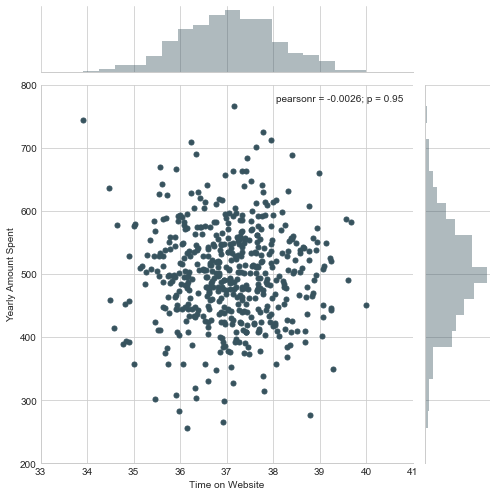

In [7]:
#Using seaborn to create a jointplot to compare the Time on Website 
#and Yearly Amount Spent columns
sns.set_palette("GnBu_d")
j = sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,
                  xlim=(33,41),ylim=(200,800),height=7,s=25)
import scipy.stats as stats
j.annotate(stats.pearsonr)

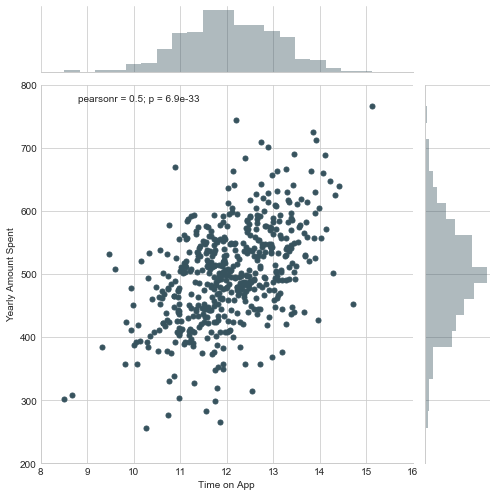

In [8]:
#The same with the Time on App column instead
sns.set_palette("GnBu_d")
j = sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,
                  xlim=(8,16),ylim=(200,800),height=7,s=25)
j.annotate(stats.pearsonr)

#### **exploring these types of relationships across the entire data set

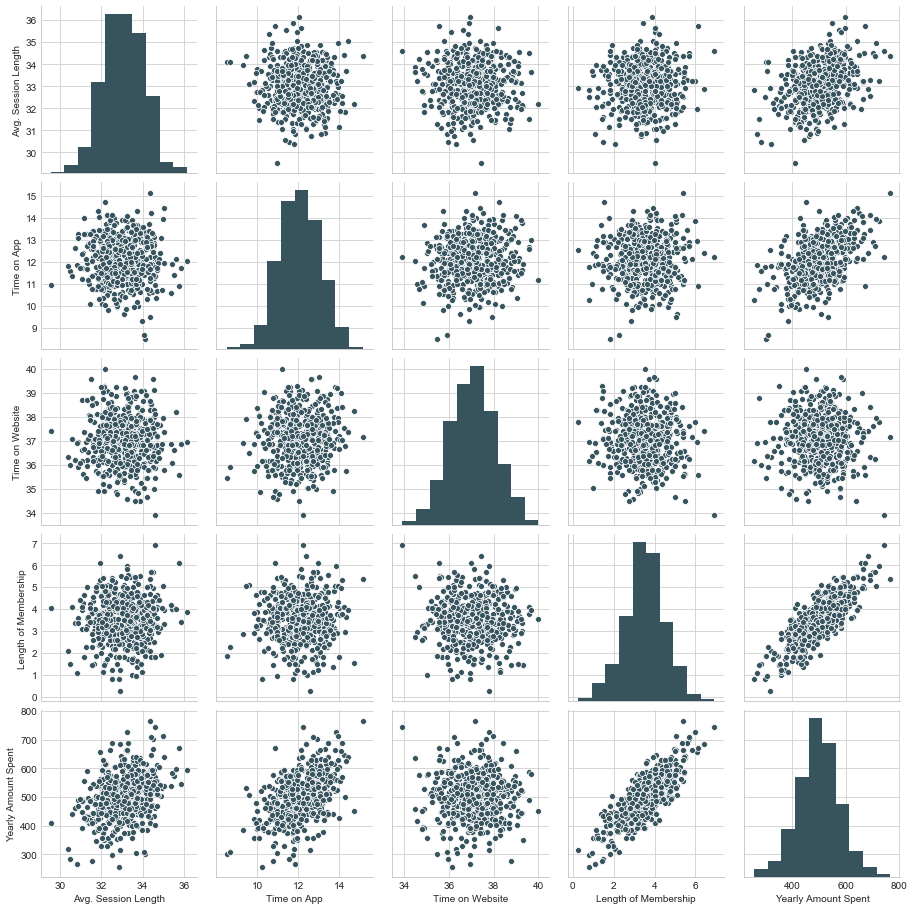

In [9]:
sns.pairplot(customers)

Based on this plot, 'Lenght of Membership' looks to be the most correlated feature with Yearly Amount Spent (dependent variable). We can also see a positive correlation between the dependent variable and 'Time on App'.

##### Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. 

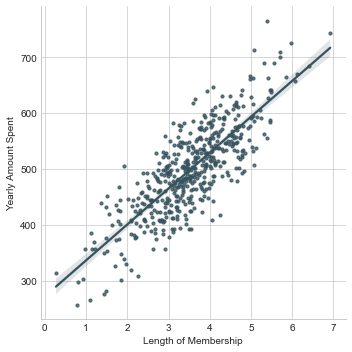

In [10]:
sns.lmplot(y='Yearly Amount Spent',x='Length of Membership',data=customers,
           scatter_kws={'s':10})

The more the two variables agree, the more the scatters tend to concentrate in the vicinity of the identity line.

## Training and Testing Data


In [11]:
X = customers[['Avg. Session Length','Time on App','Length of Membership', 'Time on Website']]
y = customers['Yearly Amount Spent']

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

** Training/fitting lm on the training data.**

In [16]:
lm = LinearRegression(n_jobs=1)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Printing out the coefficients of the model**

In [18]:
print('Coefficients: \n', lm.coef_)
print('Intercept: ', lm.intercept_)

Coefficients: 
 [25.98154972 38.59015875 61.27909654  0.19040528]
Intercept:  -1047.9327822502387


## Predicting Test Data
Now that I fit the model, let's evaluate its performance by predicting off the test values!

In [19]:
predictions = lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

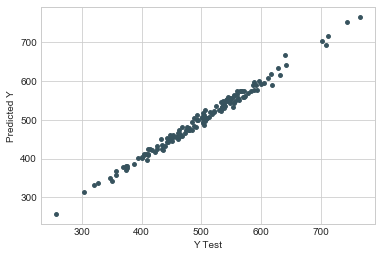

In [20]:
plt.scatter(y_test,predictions,s=15)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

In [21]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score : ',metrics.r2_score(y_test, predictions))      
print('Variance: ',metrics.explained_variance_score(y_test,predictions))


MAE:  7.228148653430847
MSE:  79.8130516509748
RMSE:  8.933815066978653
R2 score :  0.9890046246741233
Variance:  0.9890771231889606


## Residuals

Exploring the residuals to make sure everything was okay with my data. 

**Ploting a histogram of the residuals to make sure it looks normally distributed**

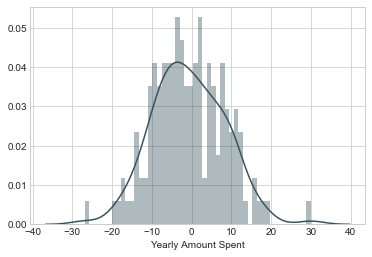

In [22]:
sns.distplot((y_test-predictions),bins=50)

## Conclusion
Coming back to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter. 

**To do so, I'll check the coefficients

In [23]:
coeff = pd.DataFrame(lm.coef_,X.columns)
coeff.columns = ['Coefficient']
coeff

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Length of Membership,61.279097
Time on Website,0.190405


**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**The company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: **Develop the Website to catch up to the performance of the mobile app**, or **develop the app more since that is what is working better.** 

This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!